In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import csv

Obtenemos el GT de SOH de la celda W9

In [3]:
# Obtenemos el ground truth
path = "C:/Users/Bruno/OneDrive - Universidad de Chile/BGMG/CASE/git_repositories/degradation_model/uncertainty_characterization/stanford_cell_SOH.csv"
SOH_gt_df = pd.read_csv(path,delimiter=';',)
SOH_gt_df = SOH_gt_df.drop(index=0).reset_index(drop=True)

path = os.path.join('C:/Users/Bruno/Dropbox','Dataset Stanford', 'W10')
files = os.listdir(path)
files.sort(key=lambda x: int(x[1 : x.find(".")]))

SOH_gt_df["files"] = files

# Display the updated DataFrame
SOH_gt_df

,W3,W4,W5,W7,W8,W9,W10,G1,V4,V5,files
0,0.991165,0.995239,0.995041,0.990868,0.991326,0.991863,0.993366,0.986739,0.991591,0.996553,C1.csv
1,0.981574,0.984155,0.984068,0.977048,0.978800,0.978999,0.979203,0.973698,0.984149,0.980047,C2.csv
2,0.000000,0.964448,0.972587,0.966905,0.969747,0.968954,0.966177,0.963144,0.976851,0.968160,C3.csv
3,0.000000,0.953926,0.953046,0.000000,0.953927,0.955331,0.954701,0.959798,0.969108,0.000000,C4.csv
4,0.000000,0.958505,0.947708,0.000000,0.951501,0.952444,0.952462,0.958529,0.964674,0.000000,C5.csv
5,0.000000,0.944989,0.940969,0.000000,0.942567,0.943475,0.943691,0.955073,0.960795,0.000000,C6.csv
6,0.000000,0.940327,0.934069,0.000000,0.934454,0.935122,0.935875,0.950352,0.955500,0.000000,C7.csv
7,0.000000,0.000000,0.936182,0.000000,0.929295,0.932702,0.933866,0.947226,0.950634,0.000000,C8.csv
8,0.000000,0.000000,0.933865,0.000000,0.930129,0.932778,0.933686,0.943072,0.947881,0.000000,C9.csv
9,0.000000,0.000000,0.930750,0.000000,0.928541,0.930311,0.930635,0.938144,0.945301,0.000000,C10.csv


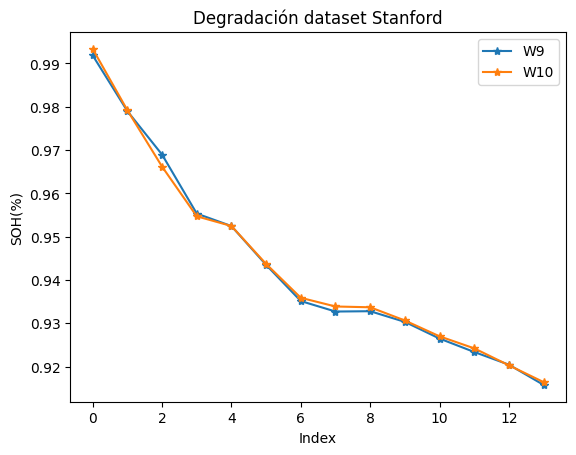

In [4]:
plt.plot(SOH_gt_df['W9'], label="W9",marker='*')
plt.plot(SOH_gt_df['W10'], label="W10",marker='*')

plt.title("Degradación dataset Stanford")
plt.xlabel("Index")
plt.ylabel("SOH(%)")
plt.legend()
plt.show()

Obtenemos los ciclos equivalentes en cada tanda de degradación

In [5]:
EQ_cycles = []
path = "C:/Users/Bruno/OneDrive - Universidad de Chile/BGMG/CASE/git_repositories/degradation_model/uncertainty_characterization/stanford_cell_cycles.csv"
cell_cycles = pd.read_csv(path,delimiter=';',)
cell_cycles_eq = pd.DataFrame()
SR_0 = 100
SR = 80
acc_subc = 0
for cell in cell_cycles.columns:
    values = cell_cycles[cell]
    for idx,subcycle in enumerate(values):
        eq_cycle = subcycle*(SR/SR_0)
        EQ_cycles.append(eq_cycle)
    cell_cycles_eq[cell] = EQ_cycles
    EQ_cycles = []

In [6]:
SOH_gt_df["W5"][13]

0.916400064

Obtenemos los valores de \eta por tanda de degradación

In [6]:
def fill_with_nan(input_list, desired_length):
    # Calculate the number of NaN values needed
    num_nan_to_add = desired_length - len(input_list)
    
    # If the current length is less than the desired length, add NaN values
    if num_nan_to_add > 0:
        input_list.extend([np.nan] * num_nan_to_add)
    
    # If the list is longer than the desired length, it will be truncated
    return input_list[:desired_length]


eta_values = pd.DataFrame(columns=cell_cycles_eq.columns)
cell_eta_values = []
for cell in cell_cycles.columns:
    SOH_0 = 1
    for idx,cycle in enumerate(cell_cycles_eq[cell]):
        SOH_k = SOH_gt_df[cell][idx]
        if SOH_k == 0:
            break
        else:
            eta_k = (SOH_k/SOH_0)**(1/cycle)
            cell_eta_values.append(eta_k)
            SOH_0 = SOH_k
    cell_eta_values = fill_with_nan(cell_eta_values,14)
    eta_values[cell] = cell_eta_values
    cell_eta_values = []
eta_values 

,W3,W4,W5,W7,W8,W9,W10,G1,V4,V5
0,0.999556,0.999761,0.999751,0.999541,0.999564,0.999592,0.999667,0.999333,0.999472,0.999640
1,0.999757,0.999720,0.999723,0.999649,0.999682,0.999674,0.999641,0.996680,0.999623,0.996527
2,NaN,0.999473,0.999707,0.999739,0.999768,0.999726,0.999644,0.998056,0.999628,0.998614
3,NaN,0.998477,0.999254,NaN,0.999106,0.999196,0.999378,0.999826,0.999602,NaN
4,NaN,1.000222,0.999123,NaN,0.998410,0.996223,0.998534,0.999934,0.999771,NaN
5,NaN,0.998956,0.999554,NaN,0.988276,0.988244,0.996152,0.999819,0.999799,NaN
6,NaN,0.997942,0.998686,NaN,0.998201,0.997225,0.998701,0.999752,0.999724,NaN
7,NaN,NaN,1.000113,NaN,0.999753,0.999888,0.999907,0.999835,0.999734,NaN
8,NaN,NaN,0.999876,NaN,1.000030,1.000003,0.999993,0.999780,0.999855,NaN
9,NaN,NaN,0.999833,NaN,0.999915,0.999868,0.999836,0.999738,0.999864,NaN


Obenemos la media y varianza de los valores de eta

In [7]:
total_eta_values = []
for cell in eta_values.columns:
    non_nan_values = [x for x in list(eta_values[cell].values) if not np.isnan(x)]
    for elem in non_nan_values:
        total_eta_values.append(elem)

In [8]:
mean_value = np.mean(total_eta_values)
std_dev_value = np.std(total_eta_values, ddof=1)  # ddof=1 for sample standard deviation (unbiased)

print(f"Mean: {mean_value}")
print(f"Standard Deviation: {std_dev_value}")

Mean: 0.999161393145505
Standard Deviation: 0.0018397938597426776


Graficamos los valores de eta en función del SOH

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


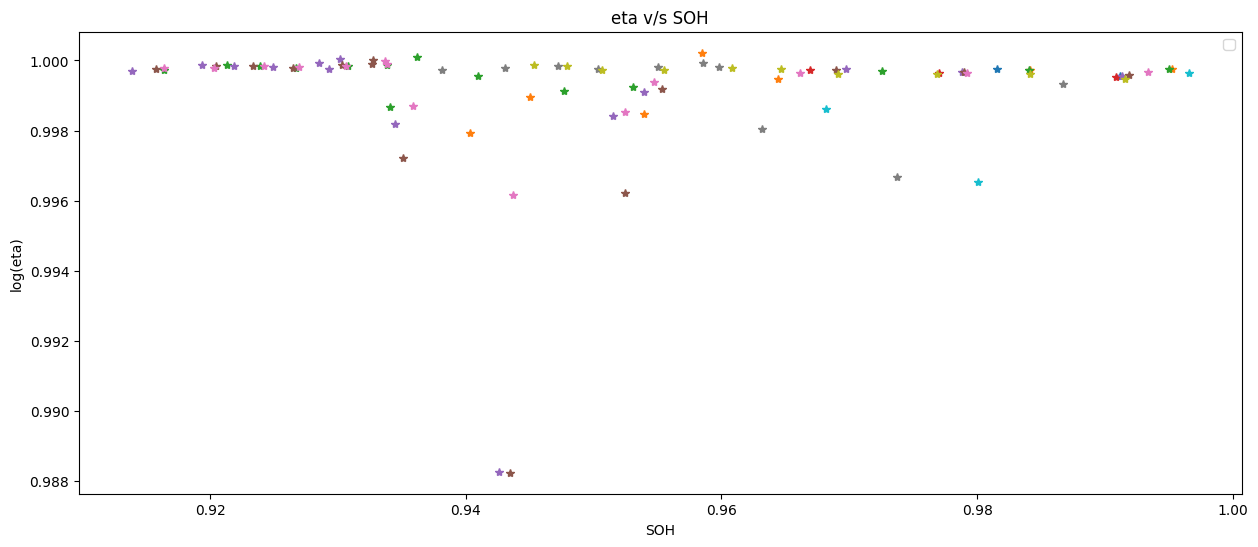

In [9]:
plt.figure(figsize=(15, 6))
for cell in eta_values.columns:
    eta_values_ = eta_values[cell]
    Soh_values = SOH_gt_df[cell]
    plt.plot(Soh_values,eta_values_,'*')
# c = plt.hist(total_eta_values,100,density=True)
a = plt.xticks()
b = plt.yticks()
plt.title("eta v/s SOH")
plt.xlabel("SOH")
plt.ylabel("log(eta)")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


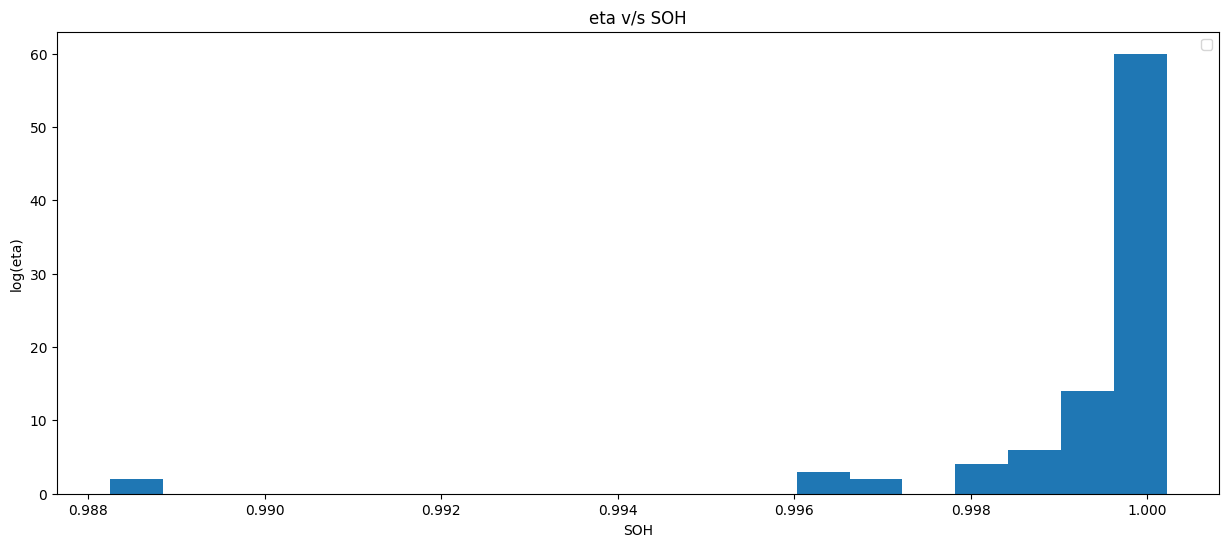

In [11]:
plt.figure(figsize=(15, 6))
# for cell in eta_values.columns:
#     eta_values_ = eta_values[cell]
#     Soh_values = SOH_gt_df[cell]
#     plt.plot(Soh_values,eta_values_,'*')
c = plt.hist(total_eta_values,20,density=False)
xs = plt.xticks()
ys = plt.yticks()
plt.title("eta v/s SOH")
plt.xlabel("SOH")
plt.ylabel("log(eta)")
plt.legend()
plt.show()

In [15]:
eta_values_sorted = sorted(total_eta_values)

for value in eta_values_sorted[:2]:
    eta_values_sorted.remove(value)

np.savetxt("eta_values_sorted.csv", eta_values_sorted, delimiter=",")

In [13]:
Xs = []
i = 0 
while i < (len(c[1])-1):
    initial = c[1][i]
    final = c[1][i+1]
    xss = (initial+final)/2
    Xs.append(xss)
    i+=1
Ys = c[0]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


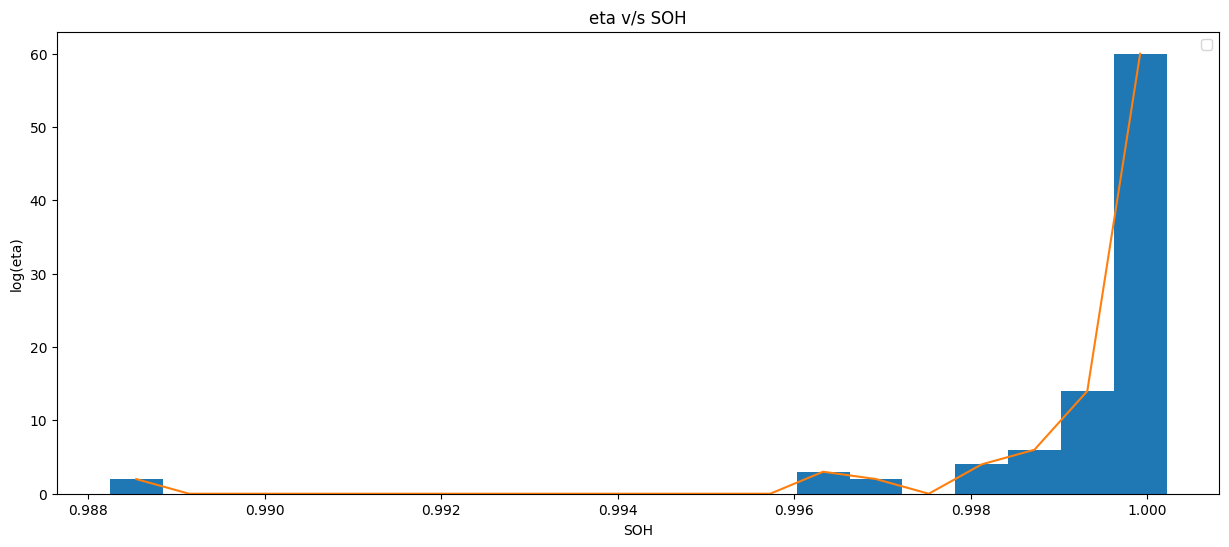

In [14]:
plt.figure(figsize=(15, 6))
# for cell in eta_values.columns:
#     eta_values_ = eta_values[cell]
#     Soh_values = SOH_gt_df[cell]
#     plt.plot(Soh_values,eta_values_,'*')
c = plt.hist(total_eta_values,20,density=False)
plt.plot(Xs,Ys)
plt.title("eta v/s SOH")
plt.xlabel("SOH")
plt.ylabel("log(eta)")
plt.legend()
plt.show()

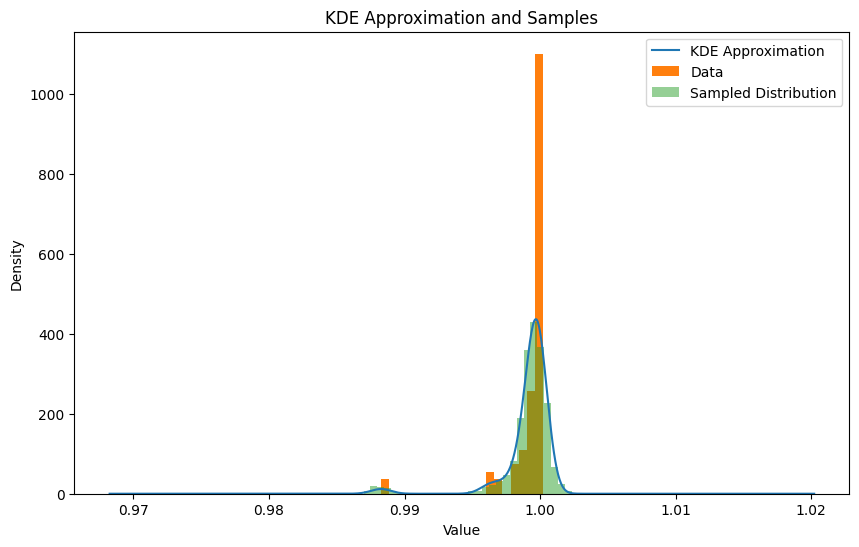

In [63]:
from scipy.stats import gaussian_kde

# Step 2: Create the KDE object
kde = gaussian_kde(total_eta_values)

# Step 3: Define the range for evaluation
x_range = np.linspace(min(total_eta_values) - 0.02, max(total_eta_values) + 0.02, 1000)

# Step 4: Evaluate the KDE on the range
kde_values = kde.evaluate(x_range)

# Step 5: Extract samples from the estimated distribution
num_samples = 1000  # Number of samples you want to generate
samples = kde.resample(num_samples)

# Step 6: Plot the KDE and the samples
plt.figure(figsize=(10, 6))
plt.plot(x_range, kde_values, label='KDE Approximation')
plt.hist(total_eta_values,20,density=True, label='Data')
v = plt.hist(samples.T, bins=30, density=True, alpha=0.5, label='Sampled Distribution')
plt.title('KDE Approximation and Samples')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

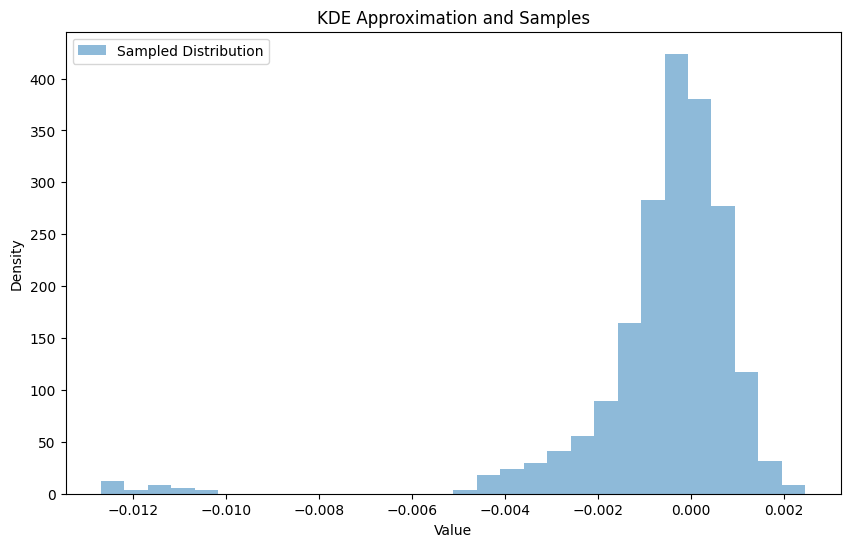

In [87]:
eta_samples =  kde.resample(1000) - 0.99980585
eta_samples

plt.figure(figsize=(10, 6))
# plt.plot(x_range, kde_values, label='KDE Approximation')
# plt.hist(total_eta_values,20,density=True, label='Data')
plt.hist(eta_samples[0], bins=30, density=True, alpha=0.5, label='Sampled Distribution')
# plt.hist(samples.T, bins=30, density=True, alpha=0.5, label='Sampled Distribution')
plt.title('KDE Approximation and Samples')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()